In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pywt.data

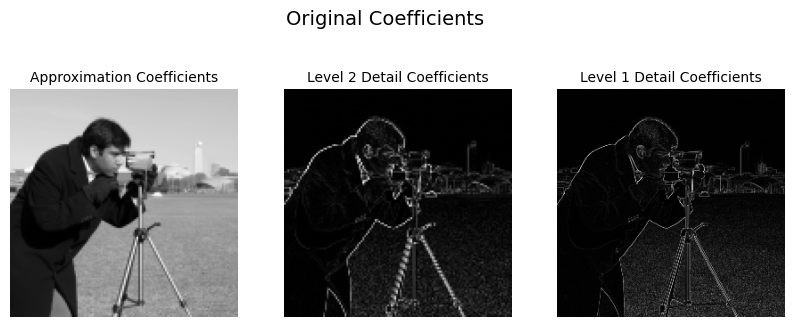

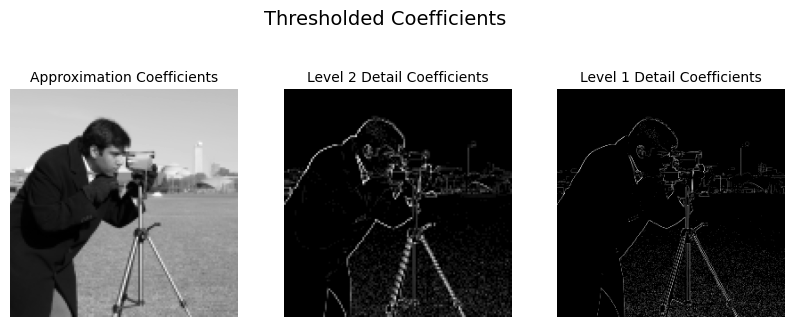

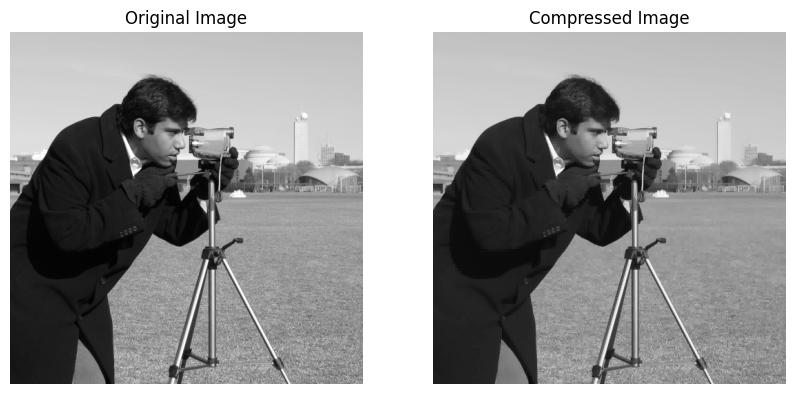

Original Image Size: 262144 pixels
Compressed Image Size (approx): 34701 non-zero coefficients
Compression Ratio: 7.55:1


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pywt.data

def plot_coefficients(coeffs, title):
    """Plot the wavelet coefficients."""
    cA, (cH2, cV2, cD2), (cH1, cV1, cD1) = coeffs
    fig, axs = plt.subplots(1, 3, figsize=(10, 4))
    axs[0].imshow(cA, cmap='gray')
    axs[0].set_title('Approximation Coefficients', fontsize=10)
    axs[0].axis('off')

    axs[1].imshow(np.abs(cH2) + np.abs(cV2) + np.abs(cD2), cmap='gray')
    axs[1].set_title('Level 2 Detail Coefficients', fontsize=10)
    axs[1].axis('off')

    axs[2].imshow(np.abs(cH1) + np.abs(cV1) + np.abs(cD1), cmap='gray')
    axs[2].set_title('Level 1 Detail Coefficients', fontsize=10)
    axs[2].axis('off')

    fig.suptitle(title, fontsize=14)

# Load an example image
original = pywt.data.camera()

# Perform a 2-level wavelet decomposition of the image
coeffs = pywt.wavedec2(original, 'haar', level=2)

# Plot original coefficients
plot_coefficients(coeffs, "Original Coefficients")

# Apply thresholding to detail coefficients and calculate non-zero coefficients for compression size
threshold = 20
coeffs_thresholded = list(coeffs)
coeffs_thresholded[1:] = [(np.where(np.abs(cH) < threshold, 0, cH),
                           np.where(np.abs(cV) < threshold, 0, cV),
                           np.where(np.abs(cD) < threshold, 0, cD)) for cH, cV, cD in coeffs[1:]]

# Plot thresholded coefficients
plot_coefficients(coeffs_thresholded, "Thresholded Coefficients")

# Reconstruct the image from the thresholded coefficients
reconstructed = pywt.waverec2(coeffs_thresholded, 'haar')

# Calculate the original and compressed sizes
original_size = np.product(original.shape)
compressed_size = np.sum([np.count_nonzero(c) for c in pywt.coeffs_to_array(coeffs_thresholded)[0]])

# Calculate the compression ratio
compression_ratio = original_size / compressed_size

# Display the original and compressed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Compressed Image')
plt.imshow(reconstructed, cmap='gray')
plt.axis('off')

plt.show()

print(f"Original Image Size: {original_size} pixels")
print(f"Compressed Image Size (approx): {compressed_size} non-zero coefficients")
print(f"Compression Ratio: {compression_ratio:.2f}:1")


# Atempt 2

In [20]:
import numpy as np
from scipy.fft import fft2, ifft2
from PIL import Image

def compress_image(img, compression_ratio):
    # Convert image to grayscale
    gray = np.array(img.convert('L'))

    # Compute Fourier Transform
    f = fft2(gray)

    # Flatten the Fourier coefficients
    coefs = f.ravel()

    # Sort coefficients by magnitude
    sorted_coefs = np.sort(np.abs(coefs))[::-1]

    # Determine number of coefficients to keep
    num_coefs_to_keep = int(len(sorted_coefs) * compression_ratio)

    # Set small coefficients to zero
    coefs[np.abs(coefs).argsort()[:-num_coefs_to_keep]] = 0

    # Reshape coefficients back to original shape
    coefs = np.reshape(coefs, f.shape)

    # Compute inverse Fourier Transform
    compressed_img = np.abs(ifft2(coefs))

    return compressed_img

def compute_psnr(original, compressed):
    # Convert images to grayscale if necessary
    if original.ndim == 3:
        original = np.mean(original, axis=2)
    if compressed.ndim == 3:
        compressed = np.mean(compressed, axis=2)

    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr


# Load the image
image = Image.open('/Users/markson/Desktop/UCU/UCU_5K1S_LinearAlgebra/final_project/data/Set14/lenna.png')

factor_ = np.linspace(0, 1, 100)[1:]
psnr_ = []
for factor in factor_:
    compressed_image = compress_image(image, comp)

    original_size = np.array(image).size
    compressed_size = compressed_image.size
    compression_ratio = original_size / compressed_size
    psnr = compute_psnr(np.array(image), compressed_image)
    
    psnr_.append(psnr)

    print(f"Compression ratio: {compression_ratio:.2f}")
    print(f"PSNR: {psnr:.2f} dB")

# Save the compressed image
# compressed_image = Image.fromarray(compressed_image.astype('uint8'))
# compressed_image.save('compressed_image.jpg')

Compression ratio: 3.00
PSNR: 31.24 dB
Compression ratio: 3.00
PSNR: 31.24 dB
Compression ratio: 3.00
PSNR: 31.24 dB
Compression ratio: 3.00
PSNR: 31.24 dB
Compression ratio: 3.00
PSNR: 31.24 dB
Compression ratio: 3.00
PSNR: 31.24 dB
Compression ratio: 3.00
PSNR: 31.24 dB
Compression ratio: 3.00
PSNR: 31.24 dB
Compression ratio: 3.00
PSNR: 31.24 dB
Compression ratio: 3.00
PSNR: 31.24 dB
Compression ratio: 3.00
PSNR: 31.24 dB
Compression ratio: 3.00
PSNR: 31.24 dB
Compression ratio: 3.00
PSNR: 31.24 dB
Compression ratio: 3.00
PSNR: 31.24 dB
Compression ratio: 3.00
PSNR: 31.24 dB
Compression ratio: 3.00
PSNR: 31.24 dB
Compression ratio: 3.00
PSNR: 31.24 dB
Compression ratio: 3.00
PSNR: 31.24 dB
Compression ratio: 3.00
PSNR: 31.24 dB
Compression ratio: 3.00
PSNR: 31.24 dB
Compression ratio: 3.00
PSNR: 31.24 dB
Compression ratio: 3.00
PSNR: 31.24 dB
Compression ratio: 3.00
PSNR: 31.24 dB
Compression ratio: 3.00
PSNR: 31.24 dB
Compression ratio: 3.00
PSNR: 31.24 dB
Compression ratio: 3.00
P

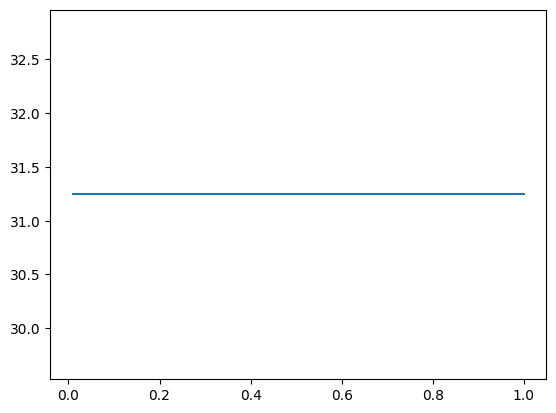

In [21]:
plt.plot(comp_, psnr_)

0/16 ; 0/16
0/16 ; 1/16
0/16 ; 2/16
0/16 ; 3/16
0/16 ; 4/16
0/16 ; 5/16


/Users/markson/Desktop/UCU/UCU_5K1S_LinearAlgebra/final_project/fractal_compression.py:51: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x, _, _, _ = np.linalg.lstsq(A, b)


0/16 ; 6/16
0/16 ; 7/16
0/16 ; 8/16
0/16 ; 9/16
0/16 ; 10/16
0/16 ; 11/16
0/16 ; 12/16
0/16 ; 13/16
0/16 ; 14/16
0/16 ; 15/16
1/16 ; 0/16
1/16 ; 1/16
1/16 ; 2/16
1/16 ; 3/16
1/16 ; 4/16
1/16 ; 5/16
1/16 ; 6/16
1/16 ; 7/16
1/16 ; 8/16
1/16 ; 9/16
1/16 ; 10/16
1/16 ; 11/16
1/16 ; 12/16
1/16 ; 13/16
1/16 ; 14/16
1/16 ; 15/16
2/16 ; 0/16
2/16 ; 1/16
2/16 ; 2/16
2/16 ; 3/16
2/16 ; 4/16
2/16 ; 5/16
2/16 ; 6/16
2/16 ; 7/16
2/16 ; 8/16
2/16 ; 9/16
2/16 ; 10/16
2/16 ; 11/16
2/16 ; 12/16
2/16 ; 13/16
2/16 ; 14/16
2/16 ; 15/16
3/16 ; 0/16
3/16 ; 1/16
3/16 ; 2/16
3/16 ; 3/16
3/16 ; 4/16
3/16 ; 5/16
3/16 ; 6/16
3/16 ; 7/16
3/16 ; 8/16
3/16 ; 9/16
3/16 ; 10/16
3/16 ; 11/16
3/16 ; 12/16
3/16 ; 13/16
3/16 ; 14/16
3/16 ; 15/16
4/16 ; 0/16
4/16 ; 1/16
4/16 ; 2/16
4/16 ; 3/16
4/16 ; 4/16
4/16 ; 5/16
4/16 ; 6/16
4/16 ; 7/16
4/16 ; 8/16
4/16 ; 9/16
4/16 ; 10/16
4/16 ; 11/16
4/16 ; 12/16
4/16 ; 13/16
4/16 ; 14/16
4/16 ; 15/16
5/16 ; 0/16
5/16 ; 1/16
5/16 ; 2/16
5/16 ; 3/16
5/16 ; 4/16
5/16 ; 5/16
5/16 ; 6/1

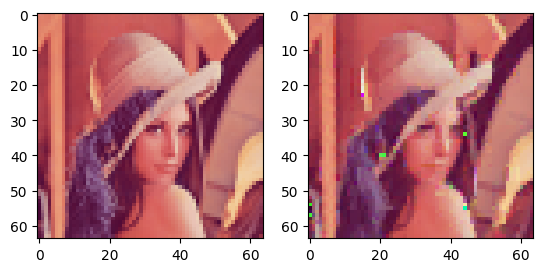

In [30]:
from fractal_compression import *
    
# for factor in factor_:
img = mpimg.imread('lena.gif')
img = reduce_rgb(img, 8)
transformations = compress_rgb(img, 8, 4, 8)
retrieved_img = decompress_rgb(transformations, 8, 4, 8)
plt.figure()
plt.subplot(121)
plt.imshow(np.array(img).astype(np.uint8), interpolation='none')
plt.subplot(122)
plt.imshow(retrieved_img.astype(np.uint8), interpolation='none')
plt.show()

In [ ]:
compute_psnr(np.array(image), decompress_rgb)